# MatplotLib

In [1]:


# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import yfinance as yf
from datetime import datetime, date
import numpy as np
import os
import mplcyberpunk


In [2]:
cotacoes = yf.download('^BVSP')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


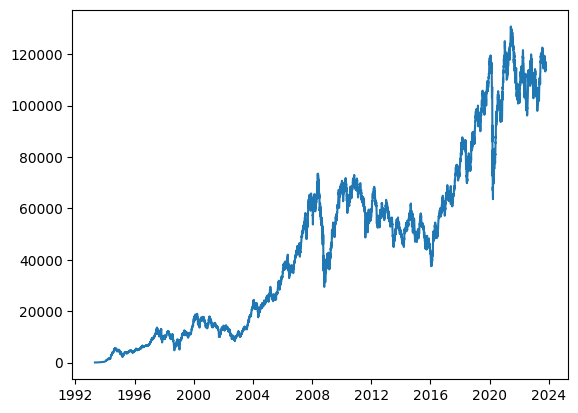

In [3]:
fig, ax = plt.subplots()

ax.plot(cotacoes)

MovieWriter ffmpeg unavailable; using Pillow instead.


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


ValueError: unknown file extension: .mp4

a


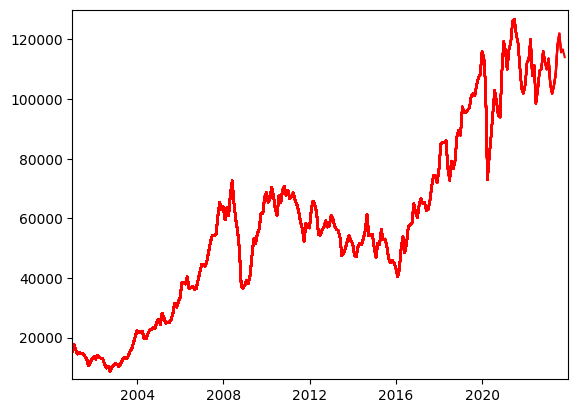

In [8]:
cotacoes_ani = cotacoes.resample('M').last()

fig, ax = plt.subplots()
ax.set_xlim(date(2001, 1, 1), date(2023, 12, 31))
ax.set_ylim(6000, 130000)

def animate(i):
    print('a')
    data = cotacoes_ani.iloc[:int(i+1)]
    ax.plot(data.index, data.values, color = 'r')

ani = FuncAnimation(fig, animate, frames = range(0, len(cotacoes_ani)),
    interval=50, repeat = False)

ani.save('Test.mp4')

plt.show()